# Dimensionality reduction

The first part of this introduction to dimensionality reduction focuses on feature **transformation**. We will show how to apply the following approaches:
1. PCA / MDS / UMAP / t-SNE ?  
2. Autoencoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Load the data

In [3]:
data_with_labels = pd.read_csv("./data/tomatos_with_targets.txt", index_col=0)
data_with_labels.head()

,Solyc02g081130.1.1,Solyc12g038200.1.1,Solyc00g097760.1.1,Solyc08g069180.2.1,Solyc01g012570.1.1,Solyc08g076670.2.1,Solyc04g024840.2.1,Solyc09g074310.2.1,Solyc09g005370.1.1,Solyc12g098180.1.1,...,Solyc01g088670.1.1,Solyc06g063380.1.1,Solyc10g050450.1.1,Solyc07g051990.1.1,Solyc02g093490.2.1,Solyc10g007270.2.1,species,position,tissue,root
penn.Sh.floral,1.169216,0.000000,0.0,1.305753,0.0,4.634343,2.860965,3.242561,0.0,0.0,...,2.120579,0.0,0.000000,0.0,5.027894,0.0,penn,Sh,floral,0
penn.Sh.leaf,0.000000,0.858644,0.0,2.948383,0.0,4.653912,2.241161,2.922573,0.0,0.0,...,1.370140,0.0,2.006256,0.0,5.068390,0.0,penn,Sh,leaf,0
penn.Sh.root,0.000000,0.000000,0.0,0.469958,0.0,5.798938,3.217704,2.229663,0.0,0.0,...,1.970763,0.0,1.688588,0.0,4.889667,0.0,penn,Sh,root,1
penn.Sh.sdling,1.813992,0.000000,0.0,2.586147,0.0,4.771861,3.099842,3.452604,0.0,0.0,...,1.982446,0.0,1.651062,0.0,3.105620,0.0,penn,Sh,sdling,0
penn.Sh.stem,0.000000,0.000000,0.0,1.540887,0.0,4.907770,4.800873,1.973890,0.0,0.0,...,1.452937,0.0,0.000000,0.0,4.993720,0.0,penn,Sh,stem,0


## PCA

In [4]:
labels = ['species','position','tissue','root']
data = data_with_labels.drop(columns = labels, axis = 1)
pc = PCA(n_components=10)
data_transformed = pc.fit_transform(data)

First, we visualize the data based on the first two principal components. This will show us the main sources of variation. Since we do not have any prior knowledge, we use all the label information that is available to us to mark the samples (here, the color indicates the tissue, and the shape indicates the combination of species and growing condition). What is the main source of variation in this data set? Side remark: If we have more label combinations than can be distinguished in one plot, we can produce multiple plots, e.g. one for each labeling type (tissue, species, condition).

penn


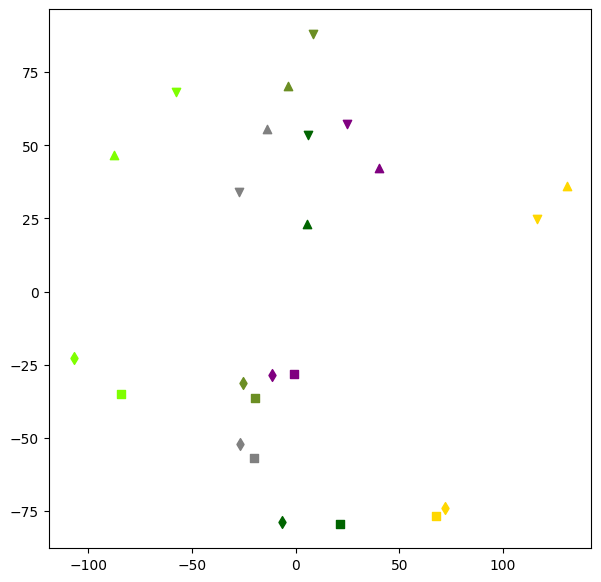

In [8]:
tissue_dict = {'floral': 'gold', 'leaf': 'chartreuse', 'root': 'gray', 'sdling': 'olivedrab', 'stem': 'darkgreen', 'veg': 'purple'}
species_condition_dict = {'penn.Sun': 's', 'penn.Sh': 'd', 'M82.Sun': '^', 'M82.Sh': 'v'}
plt.figure(figsize=(7, 7))
for i in range(0,len(data.index)):
    plt.scatter(data_transformed[i,1], data_transformed[i,2], marker=species_condition_dict['.'.join([data_with_labels.iloc[i]['species'], data_with_labels.iloc[i]['position']])], c=tissue_dict[data_with_labels.iloc[i]['tissue']])
plt.show()

The plot reveals that the tissue type is the main source of variation in the data. Samples of the same tissue type are clustered together.
- Different than R results, need to compare Helena's and my preprocessing

- Look at PC1-PC3, PC2-PC3 plots and top-weight genes (separating roles of PC2 (floral tissue) and PC3 (species), top genes of PC3 known function in drought tolerance), maybe also PC4 to show that it is not a condition separation
- How many components to look at: Percent of variance, screeplot
- UMAP
- MDS
- Autoencoders (scArches, plain VAE or rna-seq-vae)
- Precision-recall tradeoff of dim reduction
- Discussion advantages/disadvantages of methods, when to use which one